In [38]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
import os
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fitsl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:


def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())

root = root.replace('\\', '/')

# def fk_apply_literal(x):
#     try:
#         return ast.literal_eval(x)
#     except Exception as e: 
#         print(e, x)
#         return None




In [40]:
def analyze_sentiment(line):
    try:
        analyzer = SentimentIntensityAnalyzer()
        return analyzer.polarity_scores(line)
    except Exception as e:
        print(f"Error analyzing line: {line}")
        print(f"Error details: {str(e)}")
        return None  # Return None or a default value in case of error

In [41]:
def get_lines(file_path):
    # Ensure the file exists
    if not os.path.isfile(file_path):
        print(f"File {file_path} does not exist.")
        return

    # Open and read the file line by line
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        
    return lines



In [42]:
# def process_file(file_path, output_csv, start=None, end=None, chunksize=10000,):
#     lines = get_lines
#     if start: lines = lines[start:]
#     if end: lines = lines[:end]


#     for chunk in range(lines[0], lines[-1], chunksize):
#         with ThreadPoolExecutor() as executor:
#             results = list(executor.map(analyze_sentiment, lines[:10000]))
#         results = pd.DataFrame(results)
    
 


In [43]:
def process_file(file_path, start=None, end=None, chunksize=10000, output_csv="sentiment_results.csv"):
    """
    Process the file in chunks of `chunksize` lines, analyze sentiment, and write the results to a CSV.
    
    :param file_path: Path to the file to be processed.
    :param start: Optional start line (zero-indexed).
    :param end: Optional end line (zero-indexed).
    :param chunksize: The size of the chunk to process at a time.
    :param output_csv: Path where the CSV output will be saved.
    """
    
    # Step 1: Get lines from the file
    lines = get_lines(file_path)
    
    # Step 2: Slice the lines if start or end indices are provided
    if start is not None:
        lines = lines[start:]
    if end is not None:
        lines = lines[:end]
    

      # Step 3: Initialize CSV writing (write header if new file)
    if not os.path.exists(output_csv):
        header = ['neg', 'neu', 'pos', 'compound']
        df_header = pd.DataFrame(columns=header)
        df_header.to_csv(output_csv, index=False)


    # Step 4: Process the lines in chunks of `chunksize`
    total_lines = len(lines)
    print(f"Processing {total_lines} lines...")

    for start_idx in range(0, total_lines, chunksize):


        end_idx = min(start_idx + chunksize, total_lines)
        chunk = lines[start_idx:end_idx]
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"Processing chunk {start+start_idx+1} to {start+end_idx} at {timestamp}...")

        # Step 5: Use ThreadPoolExecutor to process each chunk in parallel
        with ThreadPoolExecutor() as executor:
            results = list(executor.map(analyze_sentiment, chunk))

        # Step 6: Convert results to DataFrame and append to CSV
        df_chunk = pd.DataFrame(results)
        df_chunk.to_csv(output_csv, mode='a', header=False, index=False)

        # Step 7: Print progress
        print(f"Finished lines {start+start_idx+1} to {start+end_idx} ({(end_idx/total_lines)*100:.2f}%) at {timestamp}")

    print(f"Processing complete. Results saved to {output_csv}")


In [44]:
# process_file(file_path=f"{root}/Data/Subset Data/genre_text/Action_words.txt", 
#              start=0, end=30000*5, chunksize=10000, 
#              output_csv=f"{root}/Data/Subset Data/genre_text_scores/Action_scores.csv")
# process_file(file_path=f"{root}/Data/Subset Data/genre_text/Adventure_words.txt", 
#              start=0, end=30000*5, chunksize=10000, 
#              output_csv=f"{root}/Data/Subset Data/genre_text_scores/Adventure_words.csv")

In [45]:
horror_scores = pd.read_csv(f"{root}/Data/Subset Data/genre_text_scores/Horror_scores.csv")
comedy_scores = pd.read_csv(f"{root}/Data/Subset Data/genre_text_scores/Comedy_scores.csv")
fantasy_scores = pd.read_csv(f"{root}/Data/Subset Data/genre_text_scores/Fantasy_scores.csv")
mystery_scores = pd.read_csv(f"{root}/Data/Subset Data/genre_text_scores/Mystery_scores.csv")
action_scores = pd.read_csv(f"{root}/Data/Subset Data/genre_text_scores/Action_scores.csv")
adventure_scores = pd.read_csv(f"{root}/Data/Subset Data/genre_text_scores/Adventure_words.csv")



In [46]:
# part of speech training python -- spacey

<Axes: xlabel='compound', ylabel='Count'>

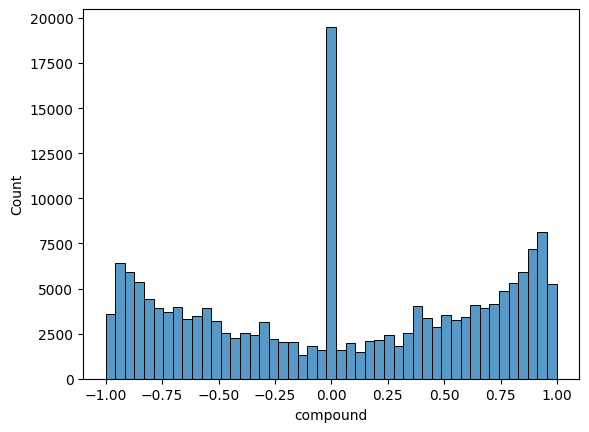

In [47]:
sns.histplot(data=horror_scores['compound'])

<Axes: xlabel='compound', ylabel='Count'>

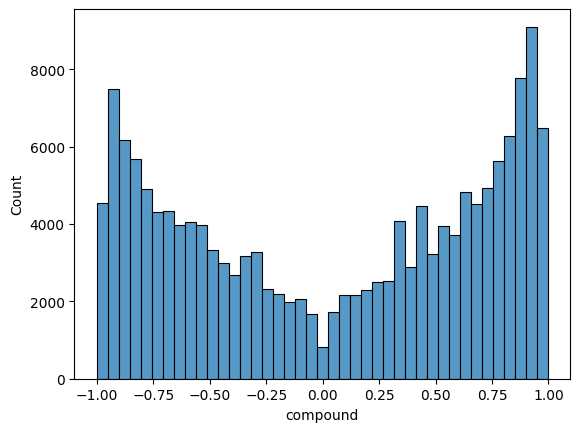

In [48]:
sns.histplot(data=horror_scores['compound'][horror_scores['compound'] !=0])

<Axes: xlabel='compound', ylabel='Count'>

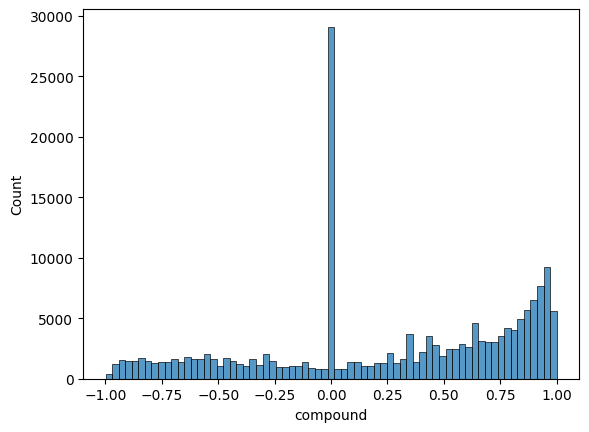

In [49]:
sns.histplot(data=comedy_scores['compound'])

<Axes: xlabel='compound', ylabel='Count'>

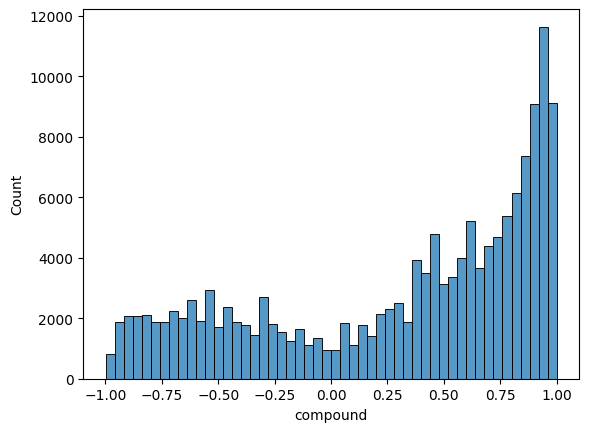

In [50]:
sns.histplot(data=comedy_scores['compound'][comedy_scores['compound'] !=0])

<Axes: xlabel='compound', ylabel='Count'>

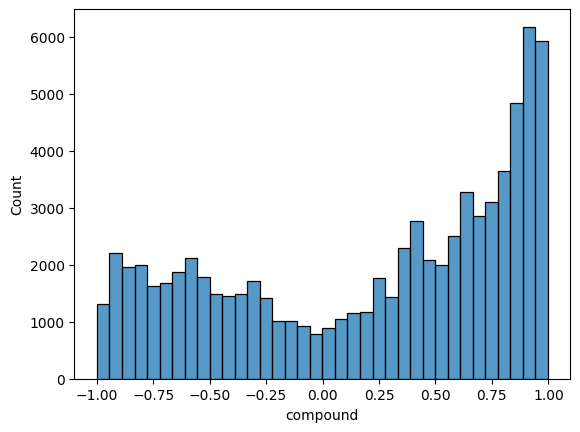

In [51]:
sns.histplot(data=fantasy_scores['compound'][fantasy_scores['compound'] !=0])

<Axes: xlabel='compound', ylabel='Count'>

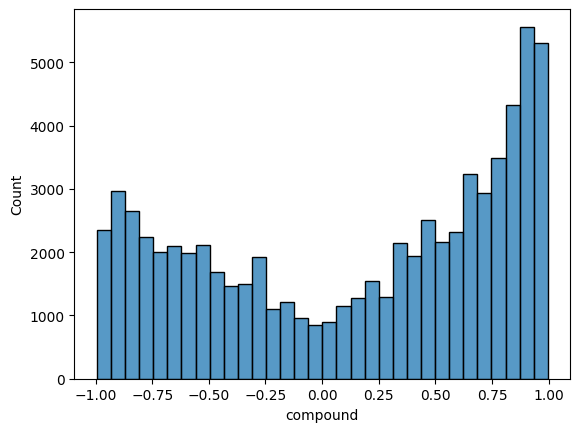

In [52]:
sns.histplot(data=mystery_scores['compound'][mystery_scores['compound'] !=0])

<Axes: xlabel='compound', ylabel='Count'>

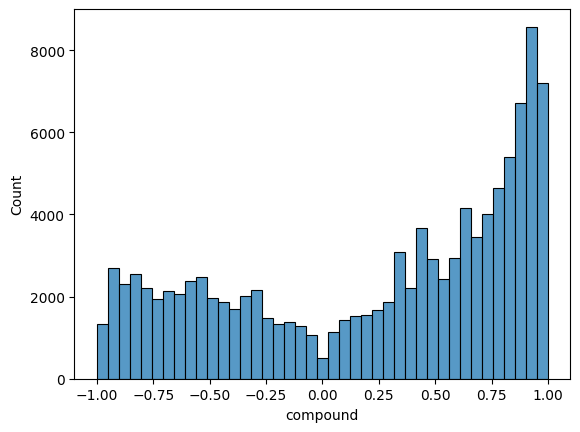

In [ ]:
sns.histplot(data=adventure_scores['compound'][adventure_scores['compound'] !=0])

<Axes: xlabel='compound', ylabel='Count'>

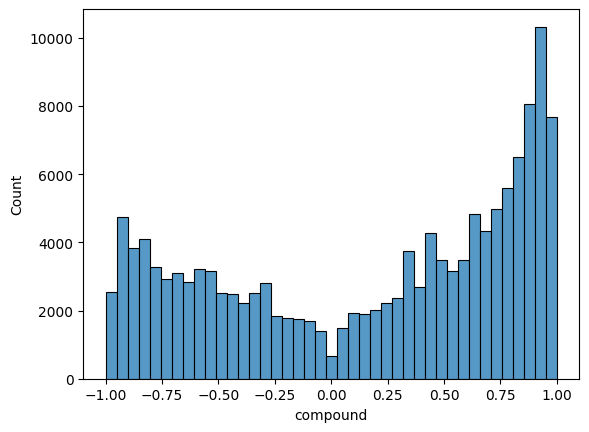

In [54]:
sns.histplot(data=action_scores['compound'][action_scores['compound'] !=0])